# Malaria Classifier with CNN

## Imports

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import data processing libraries
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

## Process Data

### Visualize Data

In [2]:
# Load directory's path into list variables for visualization
parasitized_dir = os.listdir('Data/Parasitized/')
print('Number of images in Parasitized folder:', len(parasitized_dir))
print('Examples of the path loaded:\n', parasitized_dir[:3])

uninfected_dir = os.listdir('Data/Uninfected/')
print('\nNumber of images in Uninfected folder:', len(uninfected_dir))
print('Examples of the path loaded:\n', uninfected_dir[:3])

Number of images in Parasitized folder: 13780
Examples of the path loaded:
 ['C137P98ThinF_IMG_20151005_162648_cell_10.png', 'C184P145ThinF_IMG_20151203_104153_cell_173.png', 'C184P145ThinF_IMG_20151203_103114_cell_180.png']

Number of images in Uninfected folder: 13780
Examples of the path loaded:
 ['C72P33_ThinF_IMG_20150815_104307_cell_185.png', 'C116P77ThinF_IMG_20150930_171219_cell_39.png', 'C139P100ThinF_IMG_20151005_183338_cell_96.png']


Original shape: (133, 100, 3)
Original shape: (118, 118, 3)
Original shape: (133, 142, 3)
Original shape: (145, 124, 3)


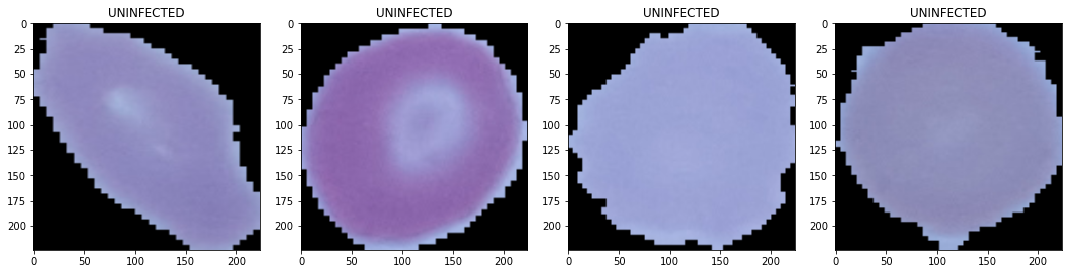

Images has been reshape to 224 x 224


In [3]:
# Uninfected Data Visualization
plt.figure(figsize = (15, 15))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = cv2.imread('Data/Uninfected' + "/" + uninfected_dir[i])
    print('Original shape:', img.shape)
    img_resize = cv2.resize(img, (224, 224))
    plt.imshow(img_resize)
    plt.title('UNINFECTED')
    plt.tight_layout()
plt.show()
print('Images has been reshape to 224 x 224')

Original shape: (97, 106, 3)
Original shape: (118, 124, 3)
Original shape: (175, 100, 3)
Original shape: (118, 124, 3)


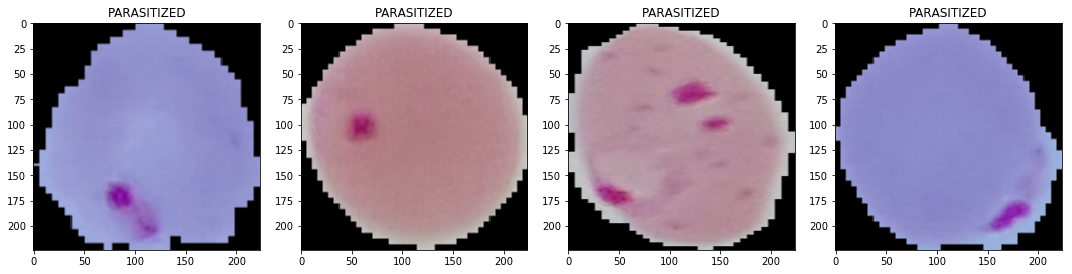

Images has been reshape to 224 x 224


In [4]:
# Parasitized Data Visualization
plt.figure(figsize = (15, 15))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = cv2.imread('Data/Parasitized' + "/" + parasitized_dir[i])
    print('Original shape:', img.shape)
    img_resize = cv2.resize(img, (224, 224))
    plt.imshow(img_resize)
    plt.title('PARASITIZED')
    plt.tight_layout()
plt.show()
print('Images has been reshape to 224 x 224')

### Load data to process

In [5]:
# Load images with glob module
uninfected_data = glob('Data/Uninfected/*.png', recursive=True)
parasitized_data = glob('Data/Parasitized/*.png', recursive=True)

print(len(uninfected_data))
print(len(parasitized_data))
print(type(uninfected_data))

13779
13779
<class 'list'>


In [7]:
# Create empty list to hold iamge processed
features = []
labels = []

# Loop into the images and resize, convert them into matrix (ndarray type)
for img in uninfected_data:
    image = cv2.imread(img)
    image_resized = cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC)
    features.append(image_resized)
    labels.append(0)
    
for img in parasitized_data:
    image = cv2.imread(img)
    image_resized = cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC)
    features.append(image_resized)
    labels.append(1)

# Convert images matrix into array
features = np.array(features)
labels = np.array(labels)

In [9]:
# Split data into training and testing with train_test_split module
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 96)

# Convert testing sets into binary category
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

## Build Model

## Train Model

## Test Model

## Save Model